In [20]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.score import *
from collections import OrderedDict
import cartopy.crs as ccrs
sns.set_style('dark')

In [21]:
import pickle
def to_pickle(obj, fn):
    with open(fn, 'wb') as f:
        pickle.dump(obj, f)
def read_pickle(fn):
    with open(fn, 'rb') as f:
        return pickle.load(f)

sns.set_style('darkgrid')
sns.set_context('notebook')

In [36]:
valid_data = xr.open_mfdataset('/Users/raymond/Desktop/Homework/DS-340W/WeatherBench/baselines/dn_3d.nc')

In [37]:
def plot_map(data, fn, cmap, vmin, vmax):
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
    I = data.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, 
                  add_labels=False, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
    I.set_edgecolor('face')
    ax.set_xticks([]); ax.set_yticks([]); ax.coastlines(alpha=0.5, lw=2)
    plt.subplots_adjust(0, 0, 1, 1)
    fig.savefig(fn, bbox_inches=0, transparent='true')

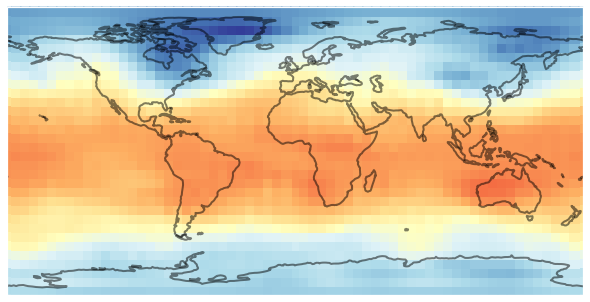

In [38]:
plot_map(valid_data.t.isel(time=3*24), '/Users/raymond/Desktop/Homework/DS-340W/WeatherBench/figures/dn_3d.pdf', 'RdYlBu_r', 240, 310)